# TASK 2 - TO EXPLORE SUPERVISED MACHINE LEARNING

Supervised learning

In [1]:
# Importingallrequiredlibraries 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as s 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
link = "http://bit.ly/w-data"
dataset = pd.read_csv(link)
print("Data imported.")          #importingdata

Data imported.


In [4]:
dataset.head()      #forsamplesofdata

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
dataset       #completedata

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Let's have a look at what our data is like


In [6]:
dataset.describe()   #Basicsstatisticsofdata

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [8]:
dataset.isna().sum()

Hours     0
Scores    0
dtype: int64

In [9]:
dataset.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [10]:
dataset.shape

(25, 2)

# Let's plot our data points, sothatwecan have a better understanding of our data and it's distribution

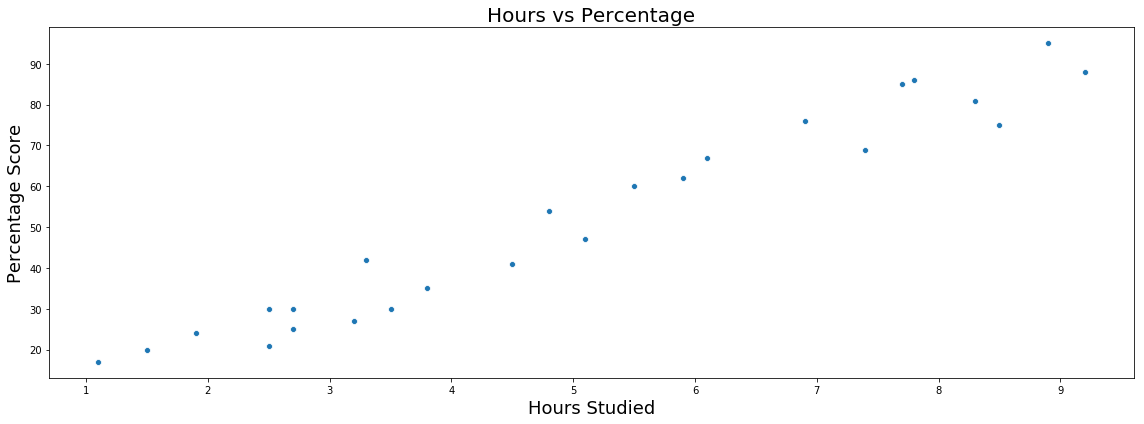

In [11]:
#Plottingthedistributionofscores
#plottingscoreswithrespecttohoursstudied

plt.figure(figsize=(16,6))

s.scatterplot(x='Hours', y='Scores', data=dataset)

plt.title('Hours vs Percentage', fontsize=20) 
plt.xlabel('Hours Studied', fontsize=18)  
plt.ylabel('Percentage Score', fontsize=18)  
plt.tight_layout()

# Visualisation of Dataset


Text(0, 0.5, 'scores')

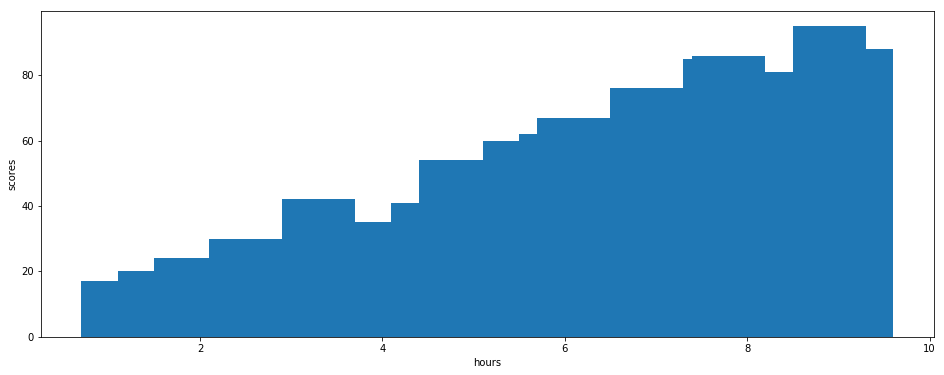

In [12]:
plt.figure(figsize=(16,6))

plt.bar(dataset['Hours'],dataset['Scores'])
plt.xlabel('hours')
plt.ylabel('scores')    #visualizationofthemodel

C:\Users\Toshal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


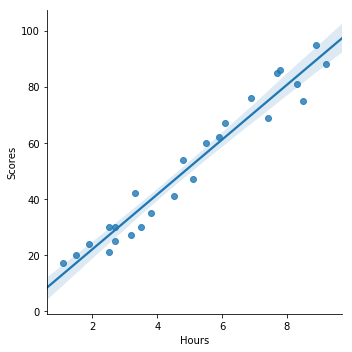

In [13]:
s.lmplot(x='Hours', y='Scores', data=dataset)

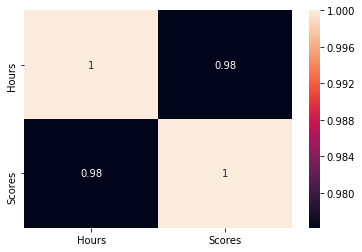

In [14]:
s.heatmap(dataset.corr(), annot=True)

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [15]:
#convertingpandasdataframeintonumpy

x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [16]:
#Splittingthedataintotrainingandtestset

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# **Training the Algorithm**

Firstly, importing of sklearn.linear_model is required for us to access LinearRegression.
It then needs to be instantiated and model fit to our training data.


In [17]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
y_pred=regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),1))

[[20.   16.88]
 [27.   33.73]
 [69.   75.36]
 [30.   26.79]
 [62.   60.49]]


In [19]:
dt=pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
dt

,y_test,y_pred
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [20]:
slope=regressor.coef_
y_intercept=regressor.intercept_
line=(slope*x)+y_intercept  #Line_Equation

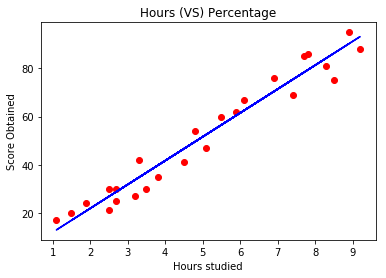

In [21]:
plt.scatter(x,y,c='r')
plt.plot(x,line,c='b')
plt.title("Hours (VS) Percentage")
plt.xlabel("Hours studied")
plt.ylabel("Score Obtained")
plt.show()

In [22]:
#predictingthescore(y_pred)forx_test

hour=9.25
percentage=regressor.predict([[hour]])
print("the student obtained {} percentage by studying {} hours".format(percentage[0],hour))

the student obtained 93.69173248737538 percentage by studying 9.25 hours


In [23]:
#Comparingy_testwiththepredictedvalue(y_pred)

r_score=r2_score(y_test,y_pred)
print(r_score)

0.9454906892105356
